In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_12a import *

In [3]:
path = datasets.Config().data_path()/'giga-fren'
path.ls()

[PosixPath('/home/akhavr/.fastai/data/giga-fren/giga-fren.release2.fixed.en'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/models'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.fr.300.bin.gz'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.fr.300.bin'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/data_save.pkl'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.en.300.bin'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.en.300.bin.gz'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/giga-fren.release2.fixed.fr'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/questions_easy.csv')]

In [ ]:
# with open(path/'giga-fren.release2.fixed.fr') as f: fr = f.read().split('\n')

In [ ]:
# with open(path/'giga-fren.release2.fixed.en') as f: en = f.read().split('\n')

In [ ]:
# re_eq = re.compile('^(Wh[^?.!]+\?)')
# re_fq = re.compile('^([^?.!]+\?)')
# en_fname = path/'giga-fren.release2.fixed.en'
# fr_fname = path/'giga-fren.release2.fixed.fr'

In [ ]:
# lines = ((re_eq.search(eq), re_fq.search(fq)) 
#         for eq, fq in zip(open(en_fname, encoding='utf-8'), open(fr_fname, encoding='utf-8')))
# qs = [(e.group(), f.group()) for e,f in lines if e and f]

In [4]:
import pandas as pd

In [ ]:
# qs = [(q1,q2) for q1,q2 in qs]
# df = pd.DataFrame({'fr': [q[1] for q in qs], 'en': [q[0] for q in qs]}, columns = ['en', 'fr'])
# df.to_csv(path/'questions_easy.csv', index=False)

In [5]:
path.ls()

[PosixPath('/home/akhavr/.fastai/data/giga-fren/giga-fren.release2.fixed.en'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/models'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.fr.300.bin.gz'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.fr.300.bin'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/data_save.pkl'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.en.300.bin'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/cc.en.300.bin.gz'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/giga-fren.release2.fixed.fr'),
 PosixPath('/home/akhavr/.fastai/data/giga-fren/questions_easy.csv')]

In [6]:
df = pd.read_csv(path/'questions_easy.csv')
df.head()

,en,fr
0,What is light ?,Qu’est-ce que la lumière?
1,Who are we?,Où sommes-nous?
2,Where did we come from?,D'où venons-nous?
3,What would we do without it?,Que ferions-nous sans elle ?
4,What is the absolute location (latitude and lo...,Quelle sont les coordonnées (latitude et longi...


In [7]:
df['en'] = df['en'].apply(lambda x:x.lower())
df['fr'] = df['fr'].apply(lambda x:x.lower())

In [44]:
il = ItemList(df.values.tolist())

In [65]:
len(il), len(df)

(52331, 52331)

In [10]:
il[0]

['what is light ?', 'qu’est-ce que la lumière?']

In [45]:
sd = SplitData.split_by_func(il, partial(random_splitter, p_valid=0.1))
sd

SplitData
Train: ItemList (47068 items)
[['who are we?', 'où sommes-nous?'], ['what would we do without it?', 'que ferions-nous sans elle ?'], ['what is the absolute location (latitude and longitude) of badger, newfoundland and labrador?', 'quelle sont les coordonnées (latitude et longitude) de badger, à terre-neuve-etlabrador?'], ['what is the major aboriginal group on vancouver island?', 'quel est le groupe autochtone principal sur l’île de vancouver?'], ['what are the advantages and disadvantages of using an online atlas versus a paper atlas?', 'quels sont les avantages et les désavantages d’utiliser un atlas en ligne comparativement à un atlas en copie papier?'], ['what types of land cover are associated with the colours below?', 'à quel type de couverture des terres associez-vous les couleurs ci-dessous?'], ['what is the population of canada?', 'quelle est la population du canada ?'], ['which province is the most populated?', 'quelle est la province la plus peuplée ?'], ['which pr

In [12]:
sd.train[0]

['what is light ?', 'qu’est-ce que la lumière?']

In [13]:
class GetterProcessor(Processor):
    def __init__(self, idx): self.idx = idx
    def __call__(self, items):
        return [i[self.idx] for i in items]

Have to create another processor, that would return `x` or `y` from the list of translation pairs

In [46]:
en_proc_tok, en_proc_num = TokenizeProcessor(max_workers=8),NumericalizeProcessor()
fr_proc_tok, fr_proc_num = TokenizeProcessor(max_workers=8),NumericalizeProcessor()

In [47]:
ll = label_by_func(sd, lambda x:x, 
                   proc_x=[GetterProcessor(1), fr_proc_tok, fr_proc_num],
                   proc_y=[GetterProcessor(0), en_proc_tok, en_proc_num], 
                  )

In [48]:
len(en_proc_num.vocab), len(fr_proc_num.vocab)

(11241, 16429)

In [17]:
ll

SplitData
Train: LabeledData
x: ItemList (904 items)
[[2, 63, 9, 20, 17, 12, 0, 8, 3], [2, 45, 375, 9, 57, 8, 3], [2, 0, 0, 9, 57, 8, 3], [2, 17, 0, 9, 57, 539, 50, 8, 3], [2, 37, 14, 11, 0, 78, 0, 18, 0, 71, 10, 0, 25, 19, 0, 9, 0, 9, 0, 8, 3], [2, 34, 16, 13, 540, 140, 541, 41, 0, 10, 0, 8, 3], [2, 23, 14, 11, 108, 18, 11, 0, 0, 38, 542, 26, 240, 0, 19, 38, 542, 26, 0, 0, 8, 3], [2, 19, 34, 153, 10, 543, 22, 0, 0, 9, 40, 11, 0, 376, 9, 0, 8, 3], [2, 37, 16, 12, 141, 21, 35, 8, 3], [2, 37, 16, 12, 154, 12, 46, 544, 8, 3]...]
Path: .
y: ItemList (904 items)
[[2, 9, 11, 0, 8, 3], [2, 20, 14, 47, 8, 3], [2, 26, 119, 47, 472, 63, 8, 3], [2, 9, 50, 47, 18, 473, 39, 8, 3], [2, 9, 11, 10, 474, 188, 75, 0, 15, 0, 69, 12, 0, 23, 0, 15, 0, 8, 3], [2, 9, 11, 10, 475, 110, 476, 51, 0, 0, 8, 3], [2, 9, 14, 10, 217, 15, 0, 12, 327, 42, 189, 477, 478, 16, 0, 477, 8, 3], [2, 9, 138, 12, 0, 328, 14, 0, 54, 10, 0, 0, 8, 3], [2, 9, 11, 10, 159, 12, 27, 8, 3], [2, 48, 218, 11, 10, 89, 329, 8, 3]...]
Path

In [18]:
def seq2seq_collate(samples, pad_idx=1, pad_first=True, backwards=False):
    "Function that collect samples and adds padding. Flips token order if needed"
    max_len_x,max_len_y = max([len(s[0]) for s in samples]),max([len(s[1]) for s in samples])
    res_x = torch.zeros(len(samples), max_len_x).long() + pad_idx
    res_y = torch.zeros(len(samples), max_len_y).long() + pad_idx
    if backwards: pad_first = not pad_first
    for i,s in enumerate(samples):
        if pad_first: 
            res_x[i,-len(s[0]):],res_y[i,-len(s[1]):] = LongTensor(s[0]),LongTensor(s[1])
        else:         
            res_x[i,:len(s[0]):],res_y[i,:len(s[1]):] = LongTensor(s[0]),LongTensor(s[1])
    if backwards: res_x,res_y = res_x.flip(1),res_y.flip(1)
    return res_x,res_y

In [19]:
def get_s2s_dls(train_ds, valid_ds, bs, **kwargs):
    train_sampler = SortishSampler(train_ds.x, key=lambda t: len(train_ds.x[t]), bs=bs)
    valid_sampler = SortSampler(valid_ds.x, key=lambda t: len(valid_ds.x[t]))
    return (DataLoader(train_ds, batch_size=bs, sampler=train_sampler,
                       collate_fn=seq2seq_collate, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, sampler=valid_sampler, 
                       collate_fn=seq2seq_collate, **kwargs))

def s2s_databunchify(sd, bs, **kwargs):
    return DataBunch(*get_s2s_dls(sd.train, sd.valid, bs, **kwargs))

In [49]:
bs = 32
data = s2s_databunchify(ll, bs)

In [50]:
iter_ds = iter(data.train_ds)
x1, y1 = next(iter_ds)
x1, y1

([2, 61, 642, 10, 57, 8, 3], [2, 24, 15, 48, 8, 3])

In [51]:
x1, y1 = next(iter_ds)
x1, y1

([2, 18, 9803, 10, 57, 260, 47, 8, 3], [2, 10, 44, 48, 20, 479, 42, 8, 3])

In [52]:
en_vocab = ll.train.proc_y[-1].vocab
en_vocab_sz = len(en_vocab)
en_vocab_sz

11241

In [53]:
fr_vocab = ll.train.proc_x[-1].vocab
fr_vocab_sz = len(fr_vocab)
fr_vocab_sz

16429

In [54]:
en_tok_pad = en_vocab.index(PAD)
fr_tok_pad = fr_vocab.index(PAD)

In [26]:
import fasttext as ft

In [55]:
fr_vecs = ft.load_model(str((path/'cc.fr.300.bin')))
en_vecs = ft.load_model(str((path/'cc.en.300.bin')))

In [28]:
def create_emb(vecs, itos, em_sz=300, mult=1., padding_idx=1):
    emb = nn.Embedding(len(itos), em_sz, padding_idx=padding_idx)
    wgts = emb.weight.data
    vec_dic = {w:vecs.get_word_vector(w) for w in vecs.get_words()}
    miss = []
    for i,w in enumerate(itos):
        try: wgts[i] = tensor(vec_dic[w])
        except: miss.append(w)
    return emb

In [56]:
emb_dec = create_emb(en_vecs, en_proc_num.vocab, padding_idx=en_tok_pad)
emb_enc = create_emb(fr_vecs, fr_proc_num.vocab, padding_idx=fr_tok_pad)
len(en_proc_num.vocab), en_vocab_sz, len(fr_proc_num.vocab), fr_vocab_sz

(11241, 11241, 16429, 16429)

In [57]:
emb_enc.weight.size(), emb_dec.weight.size()

(torch.Size([16429, 300]), torch.Size([11241, 300]))

In [31]:
class Seq2SeqRNN(nn.Module):
    def __init__(self, emb_enc, emb_dec, 
                    nh, out_sl, 
                    nl=2, bos_idx=0, pad_idx=1):
        super().__init__()
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.bos_idx,self.pad_idx = bos_idx,pad_idx
        self.em_sz_enc = emb_enc.embedding_dim
        self.em_sz_dec = emb_dec.embedding_dim
        self.voc_sz_dec = emb_dec.num_embeddings
                 
        self.emb_enc = emb_enc
        self.emb_enc_drop = nn.Dropout(0.15)
        self.gru_enc = nn.GRU(self.em_sz_enc, nh, num_layers=nl,
                              dropout=0.25, batch_first=True)
        self.out_enc = nn.Linear(nh, self.em_sz_dec, bias=False)
        
        self.emb_dec = emb_dec
        self.gru_dec = nn.GRU(self.em_sz_dec, self.em_sz_dec, num_layers=nl,
                              dropout=0.1, batch_first=True)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(self.em_sz_dec, self.voc_sz_dec)
        self.out.weight.data = self.emb_dec.weight.data
        
    def encoder(self, bs, inp):
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        _, h = self.gru_enc(emb, h)
        h = self.out_enc(h)
        return h
    
    def decoder(self, dec_inp, h):
        emb = self.emb_dec(dec_inp).unsqueeze(1)
        outp, h = self.gru_dec(emb, h)
        outp = self.out(self.out_drop(outp[:,0]))
        return h, outp
        
    def forward(self, inp):
        bs, sl = inp.size()
        h = self.encoder(bs, inp)
        dec_inp = inp.new_zeros(bs).long() + self.bos_idx
        
        res = []
        for i in range(self.out_sl):
            h, outp = self.decoder(dec_inp, h)
            dec_inp = outp.max(1)[1]
            res.append(outp)
            if (dec_inp==self.pad_idx).all(): break
        return torch.stack(res, dim=1)
    
    def initHidden(self, bs): 
        return next(self.parameters()).new_zeros(self.nl, bs, self.nh)

In [58]:
emb_sz, nh, nl = 300, 256, 2

(torch.Size([16429, 300]), torch.Size([11241, 300]))

In [59]:
model = Seq2SeqRNN(emb_enc, emb_dec, nh, nl=nl, out_sl=30)

In [34]:
iter_dl = iter(data.train_dl)
x, y = next(iter_dl)
y.size()

torch.Size([32, 59])

In [35]:
out = model.cuda()((x.cuda()))
_, out_len, vs = out.size()
out_len, vs

(30, 772)

In [36]:
def seq2seq_acc(out, targ, pad_idx=1):
    bs,targ_len = targ.size()
    _,out_len,vs = out.size()
    if targ_len>out_len: out  = F.pad(out,  (0,0,0,targ_len-out_len,0,0), value=pad_idx)
    if out_len>targ_len: targ = F.pad(targ, (0,out_len-targ_len,0,0), value=pad_idx)
    out = out.argmax(2)
    return (out==targ).float().mean()

In [37]:
cbs = [partial(AvgStatsCallback,seq2seq_acc),
       CudaCallback, 
       Recorder,
       partial(GradientClipping, clip=0.1),
       #partial(RNNTrainer, α=2., β=1.),
       ProgressCallback
      ]

In [38]:
from fastai.layers import CrossEntropyFlat

def seq2seq_loss(out, targ, pad_idx=1):
    bs,targ_len = targ.size()
    _, out_len,vs = out.size()
    if targ_len>out_len: 
        out  = F.pad(out,  (0,0,0,targ_len-out_len,0,0), value=pad_idx)
    if out_len>targ_len: 
        targ = F.pad(targ, (0,out_len-targ_len,0,0), value=pad_idx)
    return CrossEntropyFlat()(out, targ)

In [60]:
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=5e-3, 
                cb_funcs=cbs, 
                opt_func=adam_opt())
clean_learn = Learner(clean_model, data, 
                    seq2seq_loss, 
                    lr=5e-3, 
                    cb_funcs=cbs, 
                    opt_func=adam_opt())

In [61]:
lr = 5e-3
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr), ParamScheduler('mom', sched_mom)]

In [62]:
learn.fit(1, cbs=cbsched)

epoch,train_loss,train_seq2seq_acc,valid_loss,valid_seq2seq_acc,time
0,8.333026,0.086364,8.916002,0.043529,05:19


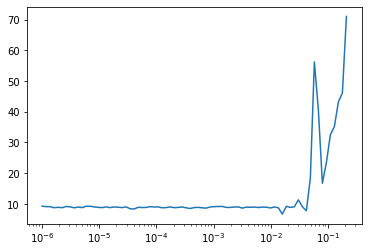

In [64]:
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=1e-4, 
                cb_funcs=[LR_Find, Recorder, CudaCallback, ProgressCallback],
                opt_func=adam_opt())
learn.fit(1)
learn.recorder.plot()

In [ ]:
lr = 5e-3
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=lr, 
                cb_funcs=cbs, 
                opt_func=adam_opt())
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr), ParamScheduler('mom', sched_mom)]

learn.fit(4, cbs=cbsched)

In [ ]:
lr = 1e-2
model = Seq2SeqRNN(emb_enc, emb_dec, nh, nl=nl, out_sl=30)
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=lr, 
                cb_funcs=cbs, 
                opt_func=adam_opt())
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr), ParamScheduler('mom', sched_mom)]

learn.fit(4, cbs=cbsched)

In [ ]:
#export
class RNNTrainer(Callback):
    def __init__(self, α, β): self.α,self.β = α,β
    
    def after_pred(self):
        #Save the extra outputs for later and only returns the true output.
        self.raw_out = self.pred
    
    def after_loss(self):
        #AR and TAR
        if self.α != 0.:  
            self.run.loss += self.α * self.raw_out[2][-1].float().pow(2).mean()
        if self.β != 0.:
            h = self.raw_out[-1]
            if len(h)>1: self.run.loss += self.β * (h[:,1:] - h[:,:-1]).float().pow(2).mean()
                
    def begin_epoch(self):
        #Shuffle the texts at the beginning of the epoch
        if hasattr(self.dl.dataset, "batchify"): self.dl.dataset.batchify()

In [ ]:
cbs = [partial(AvgStatsCallback,seq2seq_acc),
       CudaCallback, 
       Recorder,
       partial(GradientClipping, clip=0.1),
       partial(RNNTrainer, α=2., β=1.),
       ProgressCallback
      ]
lr = 5e-3
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=lr, 
                cb_funcs=cbs, 
                opt_func=adam_opt())
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr), ParamScheduler('mom', sched_mom)]
learn.fit(1, cbs=cbsched)

In [ ]:
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=1e-4, 
                cb_funcs=[LR_Find, Recorder, CudaCallback, ProgressCallback],
                opt_func=adam_opt())
learn.fit(1)
learn.recorder.plot()

In [ ]:
class NGram():
    def __init__(self, ngram, max_n=5000): self.ngram,self.max_n = ngram,max_n
    def __eq__(self, other):
        if len(self.ngram) != len(other.ngram): return False
        return np.all(np.array(self.ngram) == np.array(other.ngram))
    def __hash__(self): return int(sum([o * self.max_n**i for i,o in enumerate(self.ngram)]))
    
def get_grams(x, n, max_n=5000):
    return x if n==1 else [NGram(x[i:i+n], max_n=max_n) for i in range(len(x)-n+1)]

def get_correct_ngrams(pred, targ, n, max_n=5000):
    pred_grams,targ_grams = get_grams(pred, n, max_n=max_n),get_grams(targ, n, max_n=max_n)
    pred_cnt,targ_cnt = Counter(pred_grams),Counter(targ_grams)
    return sum([min(c, targ_cnt[g]) for g,c in pred_cnt.items()]),len(pred_grams)

class BleuCallback(Callback):
    def __init__(self, vocab_sz):
        self.vocab_sz = vocab_sz
    
    def begin_epoch(self):
        self.pred_len,self.targ_len,self.corrects,self.counts = 0,0,[0]*4,[0]*4
    
    def after_batch(self):
        last_output = self.run.pred.argmax(dim=-1)
        last_target = self.run.yb
        for pred,targ in zip(last_output.cpu().numpy(),last_target.cpu().numpy()):
            self.pred_len += len(pred)
            self.targ_len += len(targ)
            for i in range(4):
                c,t = get_correct_ngrams(pred, targ, i+1, max_n=self.vocab_sz)
                self.corrects[i] += c
                self.counts[i]   += t
    
    def after_epoch(self):
        precs = [c/t for c,t in zip(self.corrects,self.counts)]
        len_penalty = np.exp(1 - self.targ_len/self.pred_len) if self.pred_len < self.targ_len else 1
        bleu = len_penalty * ((precs[0]*precs[1]*precs[2]*precs[3]) ** 0.25)
        return print(bleu)

In [ ]:
cbs = [partial(AvgStatsCallback, seq2seq_acc),
       CudaCallback, 
       Recorder,
       partial(GradientClipping, clip=0.1),
       partial(RNNTrainer, α=2., β=1.),
       ProgressCallback
      ]
lr = 5e-3
learn = Learner(model, data, 
                seq2seq_loss, 
                lr=lr, 
                cbs = [BleuCallback(fr_vocab_sz),],
                cb_funcs=cbs, 
                opt_func=adam_opt())
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr), ParamScheduler('mom', sched_mom)]
learn.fit(1, cbs=cbsched)

In [ ]:
learn.fit(10, cbs=cbsched)

In [ ]:
def get_predictions(learn):
    learn.model.eval()
    inputs, targets, outputs = [],[],[]
    with torch.no_grad():
        for xb,yb in progress_bar(learn.dl):
            out = learn.model(xb.cuda())
            for x,y,z in zip(xb,yb,out):
                inputs.append([e for e in en_proc_num.deproc1(x) if e!='xxpad'])
                targets.append([e for e in fr_proc_num.deproc1(y) if e!='xxpad'])
                outputs.append([e for e in fr_proc_num.deproc1(z.argmax(1)) if e!='xxpad'])
    return inputs, targets, outputs

In [ ]:
inputs, targets, outputs = get_predictions(learn)

In [ ]:
il[1]

In [ ]:
print(' '.join(inputs[1]))
print('--')
print(' '.join(targets[1]))
print('--')
print(' '.join(outputs[1]))